In [ ]:
!pip install keras-tuner --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.6/169.6 KB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 54.4 MB/s eta 0:00:00


In [ ]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import keras_tuner as kt
from keras import models, layers
from keras.models import Sequential
from keras.layers import Dense, Input, InputLayer, Dropout, Flatten, Conv2D
from keras.layers import MaxPooling2D, BatchNormalization,GlobalAveragePooling2D

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
! unzip -qq /content/drive/MyDrive/Plant-Diseases-Dataset.zip

In [ ]:
plant_dirs = list(os.listdir('/content/Plant Diseases Dataset'))
plant_dirs

['Strawberry',
 'Apple',
 'Peach',
 'Tomato',
 'Grape',
 'Corn (Maize)',
 'Bell Pepper',
 'Cherry',
 'Potato']

In [ ]:
def get_path(plant_dir:str, test:bool=False):
  if test:
    return '/content/Plant Diseases Dataset/' + plant_dir + '/Test'

  else:
    return '/content/Plant Diseases Dataset/' + plant_dir + '/Train'

In [ ]:
def test_val_partitions(test_ds, val_split: float, shuffle: bool, shuffle_size: int):

  val_size = int(len(test_ds)*val_split)

  if shuffle:
    test_ds = test_ds.shuffle(shuffle_size, seed = 42)

  val_data = test_ds.take(val_size)
  test_data = test_ds.skip(val_size)

  return test_data, val_data


In [ ]:
image_size = (256, 256)
batch_size = 32

In [ ]:
plant_dataset_train = {}
print('================ Images & Classes for Training ================\n')
for plant in plant_dirs:
  print('>>> No. of Images & Classes in "{}" directory'.format(plant))
  plant_dataset_train[plant] = tf.keras.preprocessing.image_dataset_from_directory(
    get_path(plant),
    shuffle = True,
    labels = 'inferred',
    label_mode = 'int',
    image_size = image_size,
    batch_size = batch_size
  )
  print ("______________\n")

================ Images & Classes for Training ================

>>> No. of Images & Classes in "Strawberry" directory
Found 3598 files belonging to 2 classes.
______________

>>> No. of Images & Classes in "Apple" directory
Found 7771 files belonging to 4 classes.
______________

>>> No. of Images & Classes in "Peach" directory
Found 3566 files belonging to 2 classes.
______________

>>> No. of Images & Classes in "Tomato" directory
Found 18345 files belonging to 10 classes.
______________

>>> No. of Images & Classes in "Grape" directory
Found 7222 files belonging to 4 classes.
______________

>>> No. of Images & Classes in "Corn (Maize)" directory
Found 7316 files belonging to 4 classes.
______________

>>> No. of Images & Classes in "Bell Pepper" directory
Found 3901 files belonging to 2 classes.
______________

>>> No. of Images & Classes in "Cherry" directory
Found 3509 files belonging to 2 classes.
______________

>>> No. of Images & Classes in "Potato" directory
Found 5702 file

In [ ]:
test_dataset = {}
print('============ Images & Classes for Testing & Validation ============\n')
for plant in plant_dirs:
  print('>>> No. of Images & Classes in "{}" directory'.format(plant))
  test_dataset[plant] = tf.keras.preprocessing.image_dataset_from_directory(
    get_path(plant, test = True),
    shuffle = True,
    labels = 'inferred',
    label_mode = 'int',
    image_size = image_size,
    batch_size = batch_size
  )
  print ("______________\n")

============ Images & Classes for Testing & Validation ============

>>> No. of Images & Classes in "Strawberry" directory
Found 900 files belonging to 2 classes.
______________

>>> No. of Images & Classes in "Apple" directory
Found 1943 files belonging to 4 classes.
______________

>>> No. of Images & Classes in "Peach" directory
Found 891 files belonging to 2 classes.
______________

>>> No. of Images & Classes in "Tomato" directory
Found 4585 files belonging to 10 classes.
______________

>>> No. of Images & Classes in "Grape" directory
Found 1805 files belonging to 4 classes.
______________

>>> No. of Images & Classes in "Corn (Maize)" directory
Found 1829 files belonging to 4 classes.
______________

>>> No. of Images & Classes in "Bell Pepper" directory
Found 975 files belonging to 2 classes.
______________

>>> No. of Images & Classes in "Cherry" directory
Found 877 files belonging to 2 classes.
______________

>>> No. of Images & Classes in "Potato" directory
Found 1426 files

In [ ]:
plant_dataset_test = {}
plant_dataset_val = {}
for plant in plant_dirs:
  plant_dataset_test[plant], plant_dataset_val[plant] = test_val_partitions(
      test_dataset[plant],
      val_split = 0.3,
      shuffle = True,
      shuffle_size = 10000
  )

In [ ]:
classes = {}
for plant in plant_dirs:
  print('>>> Classes in {} dataset :-'.format(plant))
  classes[plant] = []
  for num,cat in enumerate(plant_dataset_train[plant].class_names, start = 1):
    classes[plant].append(cat)
    print(num, cat)
  print('\n')

>>> Classes in Strawberry dataset :-
1 Healthy
2 Leaf Scorch


>>> Classes in Apple dataset :-
1 Apple Scab
2 Black Rot
3 Cedar Apple Rust
4 Healthy


>>> Classes in Peach dataset :-
1 Bacterial Spot
2 Healthy


>>> Classes in Tomato dataset :-
1 Bacterial Spot
2 Early Blight
3 Healthy
4 Late Blight
5 Leaf Mold
6 Mosaic Virus
7 Septoria Leaf Spot
8 Target Spot
9 Two-Spotted Spider Mite
10 Yellow Leaf Curl Virus


>>> Classes in Grape dataset :-
1 Black Rot
2 Esca (Black Measles)
3 Healthy
4 Leaf Blight


>>> Classes in Corn (Maize) dataset :-
1 Cercospora Leaf Spot
2 Common Rust 
3 Healthy
4 Northern Leaf Blight


>>> Classes in Bell Pepper dataset :-
1 Bacterial Spot
2 Healthy


>>> Classes in Cherry dataset :-
1 Healthy
2 Powdery Mildew


>>> Classes in Potato dataset :-
1 Early Blight
2 Healthy
3 Late Blight




>>> Sample Images of "Strawberry" dataset


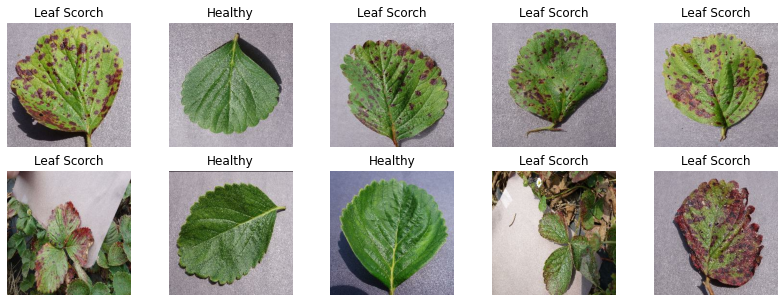



>>> Sample Images of "Apple" dataset


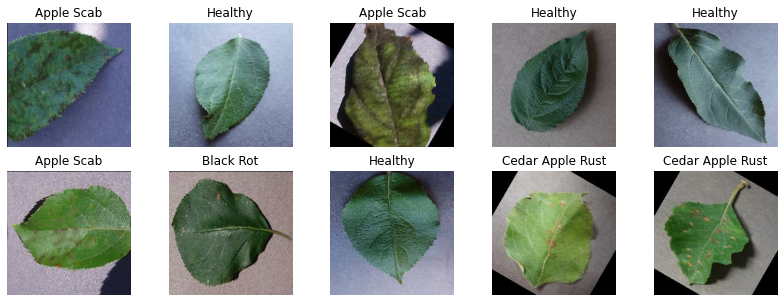



>>> Sample Images of "Peach" dataset


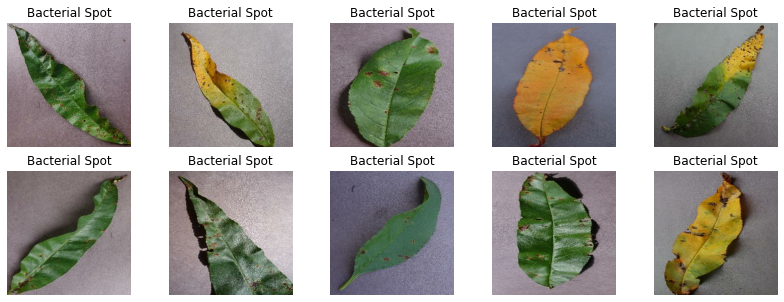



>>> Sample Images of "Tomato" dataset


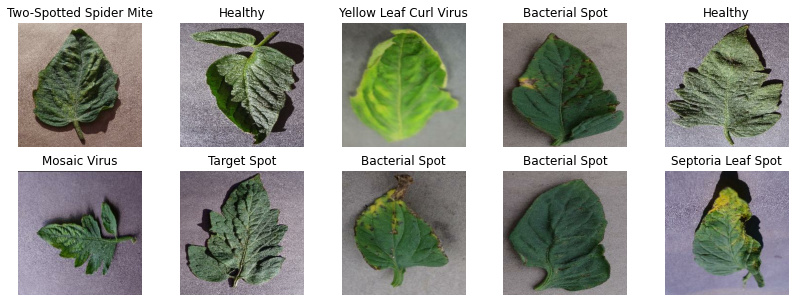



>>> Sample Images of "Grape" dataset


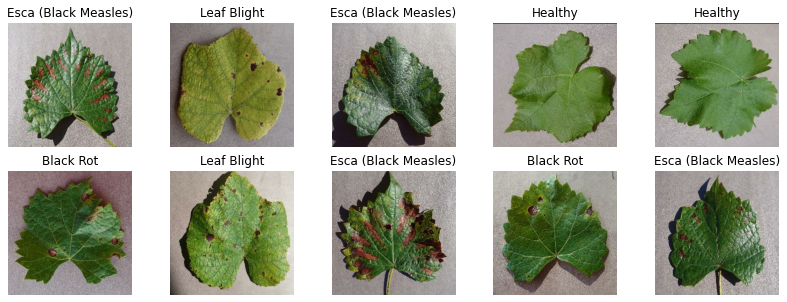



>>> Sample Images of "Corn (Maize)" dataset


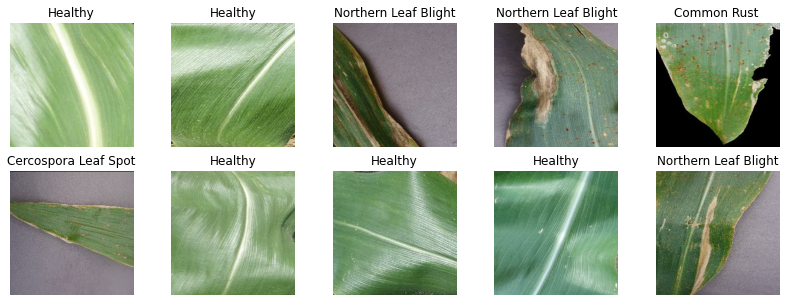



>>> Sample Images of "Bell Pepper" dataset


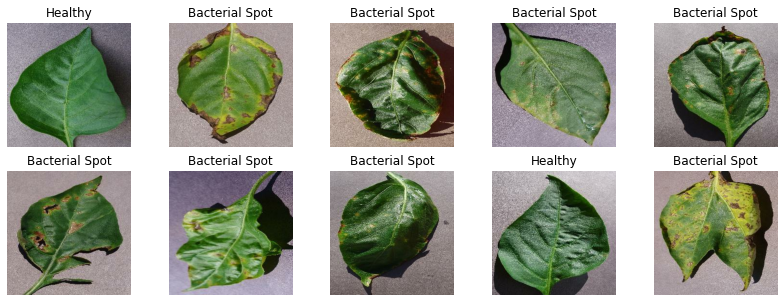



>>> Sample Images of "Cherry" dataset


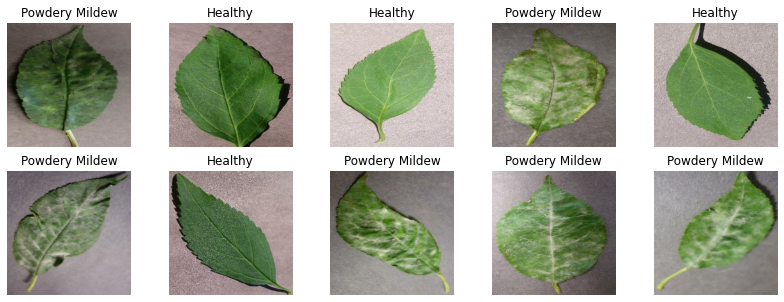



>>> Sample Images of "Potato" dataset


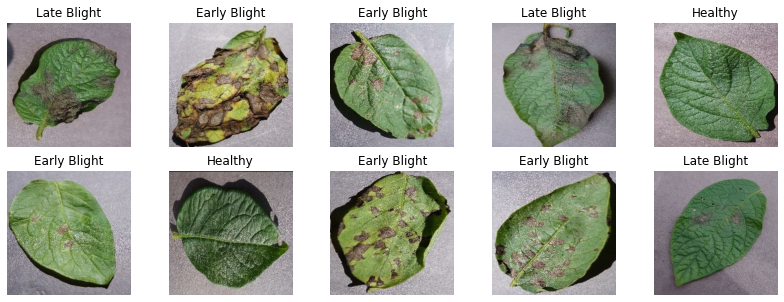

In [ ]:
for plant in plant_dirs:
  print('>>> Sample Images of "{}" dataset'.format(plant))
  plt.figure(figsize = (14,5))
  for image_batch, image_label in plant_dataset_train[plant].take(1):
    for i in range(10):
      plt.subplot(2,5,i+1)
      plt.imshow(image_batch[i].numpy().astype('uint8'))
      plt.title(classes[plant][image_label[i]])
      plt.axis('off')
    plt.show()    
  print('\n')

In [ ]:
resize_rescale_layer = tf.keras.Sequential([
    layers.Resizing(image_size[0],image_size[0]),
    layers.Rescaling(1.0/255)
])

In [ ]:
from keras.applications.resnet_v2 import ResNet50V2

In [ ]:
resnet_base = ResNet50V2(input_shape=(image_size[0],image_size[0],3),
                        weights='imagenet',
                         include_top=False)

resnet_base.trainable = False

resnet = Sequential(
        [
            resnet_base,
            GlobalAveragePooling2D(),
            Dense(128, activation='relu'),
            Dense(10, activation='softmax')
        ],
        name='ResNet50_V2'
    )

resnet.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=['accuracy'])

In [ ]:
resnet.fit(dset,
          epochs = 50, 
          validation_data = valset)

In [ ]:
model = models.Sequential([
    resize_rescale_layer,
    layers.InputLayer(input_shape=image_size),
    layers.Conv2D(32, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax'),
])

In [ ]:
dset = plant_dataset_train['Tomato']
valset = plant_dataset_val['Tomato']

In [ ]:
model.compile(optimizer='adam',
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
                metrics=['accuracy'])

In [ ]:
history = model.fit(dset,
                    epochs = 50, 
                    validation_data = valset)

In [ ]:
def create_model(hp):
  
  num_hidden_layers = 1
  num_units = 8
  dropout_rate = 0.1
  learning_rate= 0.01
  if hp:
      num_hidden_layers_1=hp.Choice('num_hidden_layers_1',values=[1,2,3])
      num_hidden_layers_2=hp.Choice('num_hidden_layers_2',values=[1,2,3])
      num_units_1 = hp.Choice('num_units_1',values=[32,64])
      num_units_2 = hp.Choice('num_units_2',values=[64,128])
      dropout_rate = hp.Float('dropout_rate', min_value=0.1,max_value=0.5,step=0.1)
      learning_rate = hp.Choice('learning_rate', values=[0.0001,0.001,0.01])
  model = tf.keras.models.Sequential()
  model.add(resize_rescale_layer)
  model.add(InputLayer(input_shape=image_size))
  model.add(tf.keras.layers.Flatten())
  for _ in range(0,num_hidden_layers_1):
    model.add(tf.keras.layers.Dense(num_units,activation='relu'))
    model.add(tf.keras.layers.Dropout(dropout_rate))
  for _ in range(0,num_hidden_layers_2):
    model.add(tf.keras.layers.Dense(num_units,activation='relu'))
    model.add(tf.keras.layers.Dropout(dropout_rate))
  model.add(tf.keras.layers.Dense(10,activation='softmax'))
  model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),  
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate),
    metrics = ['accuracy']
  )
  return model

In [ ]:
def build_model(hp):
  model = Sequential()
  model.add(resize_rescale_layer)   
  model.add(InputLayer(input_shape=image_size))

  hp_batchnorm_1 = hp.Boolean('batchnorm_1')
  if hp_batchnorm_1:
    model.add(BatchNormalization(momentum=hp.Float('momentum_1', min_value = 0.1, max_value = 0.9, step = 0.1)))

  hp_units_1 = hp.Choice('L1_units', values=[32, 64])

  for _ in range(3):
    model.add(Conv2D(hp_units_1, kernel_size=(3,3), activation='relu'))
    model.add(MaxPooling2D())
  
  hp_units_2 = hp.Choice('L2_units', values=[64, 128])

  for _ in range(3):
    model.add(Conv2D(hp_units_2, kernel_size=(3,3), activation='relu'))
    model.add(MaxPooling2D())

  hp_units_3 = hp.Choice('L3_units', values=[128, 256])

  for _ in range(3):
    model.add(Conv2D(hp_units_3, kernel_size=(3,3), activation='relu'))
    model.add(MaxPooling2D())
  

  model.add(Flatten())

  model.add(Dense(128, activation='relu'))

  hp_batchnorm_2 = hp.Boolean('batchnorm_2')
  if hp_batchnorm_2:
    model.add(BatchNormalization(momentum=hp.Float('momentum_2', min_value = 0.1, max_value = 0.9, step = 0.1)))

  hp_dropout_1 = hp.Float('dropout1', min_value = 0.1, max_value = 0.9, step = 0.1)
  model.add(Dropout(hp_dropout_1))

  model.add(Dense(128, activation='relu'))

  hp_batchnorm_3 = hp.Boolean('batchnorm_3')
  if hp_batchnorm_3:
    model.add(BatchNormalization(momentum=hp.Float('momentum_3', min_value = 0.1, max_value = 0.9, step = 0.1)))

  model.add(Dense(10, activation='softmax'))

  hp_optimizer = hp.Choice('optimizer', values=['SGD','RMSprop','Adam','Adamax'])
  model.compile(optimizer=hp_optimizer,
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
                metrics=['accuracy'])

  return model

In [ ]:
class CustomTuner(kt.tuners.BayesianOptimization):
  def run_trial(self,trial,*args,**kwargs):
    kwargs['batch_size'] = trial.hyperparameters.Int('batch_size',32,128,step=32)
    super(CustomTuner,self).run_trial(trial, *args,**kwargs)

In [ ]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

In [ ]:
tuner = kt.BayesianOptimization(
    create_model,
    objective = 'val_accuracy',
    max_trials = 50,
    directory='logs',
    project_name ='fashion_mnist',
    overwrite = True
)

In [ ]:
for img_train, label_train in valset:
  tuner.search(img_train, label_train, epochs=20, validation_split = 0.2)

Trial 27 Complete [00h 00m 07s]
val_accuracy: 0.1428571492433548

Best val_accuracy So Far: 0.2857142984867096
Total elapsed time: 00h 02m 14s

Search: Running Trial #28

Value             |Best Value So Far |Hyperparameter
2                 |3                 |num_hidden_layers_1
2                 |2                 |num_hidden_layers_2
64                |32                |num_units_1
128               |128               |num_units_2
0.2               |0.4               |dropout_rate
0.001             |0.01              |learning_rate



/usr/local/lib/python3.8/dist-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


Epoch 1/20
1/1 [==============================] - 2s 2s/step - loss: 2.3753 - accuracy: 0.1600 - val_loss: 2.3030 - val_accuracy: 0.0000e+00
Epoch 2/20
1/1 [==============================] - 0s 50ms/step - loss: 2.3017 - accuracy: 0.2400 - val_loss: 2.3030 - val_accuracy: 0.0000e+00
Epoch 3/20
1/1 [==============================] - 0s 47ms/step - loss: 2.3010 - accuracy: 0.2400 - val_loss: 2.3030 - val_accuracy: 0.0000e+00
Epoch 4/20
1/1 [==============================] - 0s 69ms/step - loss: 2.3004 - accuracy: 0.2000 - val_loss: 2.3030 - val_accuracy: 0.0000e+00
Epoch 5/20
1/1 [==============================] - 0s 62ms/step - loss: 2.2997 - accuracy: 0.1600 - val_loss: 2.3030 - val_accuracy: 0.0000e+00
Epoch 6/20
1/1 [==============================] - 0s 46ms/step - loss: 2.2989 - accuracy: 0.2000 - val_loss: 2.3030 - val_accuracy: 0.0000e+00
Epoch 7/20
1/1 [==============================] - 0s 53ms/step - loss: 2.2980 - accuracy: 0.2000 - val_loss: 2.3030 - val_accuracy: 0.0000e+00
E

In [ ]:
print(tuner.get_best_hyperparameters(num_trials=1)[0])


In [ ]:
CNN = Sequential(
    [
        Input(shape=input_shape),
        BatchNormalization(momentum=0.7),
        Conv2D(16, kernel_size=3, strides=(1, 1), activation='relu'),
        Conv2D(16, kernel_size=3, strides=(1, 1), activation='relu'),
        MaxPooling2D(),
        Conv2D(64, kernel_size=3, strides=(1, 1), activation='relu'),
        Conv2D(64, kernel_size=3, strides=(1, 1), activation='relu'),
        MaxPooling2D(),
        Conv2D(128, kernel_size=3, strides=(1, 1), activation='relu'),
        Conv2D(128, kernel_size=3, strides=(1, 1), activation='relu'),
        MaxPooling2D(),
        Flatten(),
        Dense(128, activation='relu'),
        BatchNormalization(momentum=0.7),
        Dropout(0.20),
        Dense(128, activation='relu'),
        BatchNormalization(momentum=0.7),
        Dense(1, activation='sigmoid')
    ],
    name='Regularized_CNN'
)

In [ ]:
for plant in plant_dirs:
  plant_dataset_train[plant] = plant_dataset_train[plant].cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
  plant_dataset_test[plant] = plant_dataset_test[plant].cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
  plant_dataset_val[plant] = plant_dataset_val[plant].cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)